In [1]:
# let's get started and import some numerical libraries and some data locations and constants.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

#import seaborn as sns
# set up plots
#%matplotlib inline
%matplotlib notebook
#matplotlib.rcParams['figure.figsize'] =(16., 12.)

# constants we will use throught this notebook


<IPython.core.display.Javascript object>


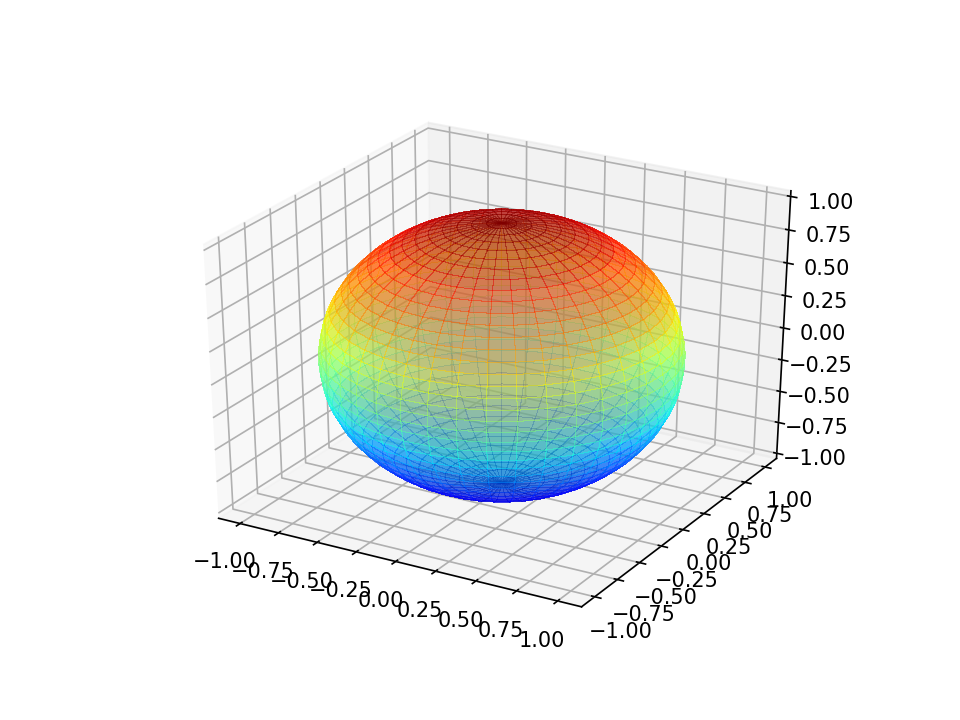

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d


theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
R = np.cos(PHI**2)
R = 1.
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

<IPython.core.display.Javascript object>


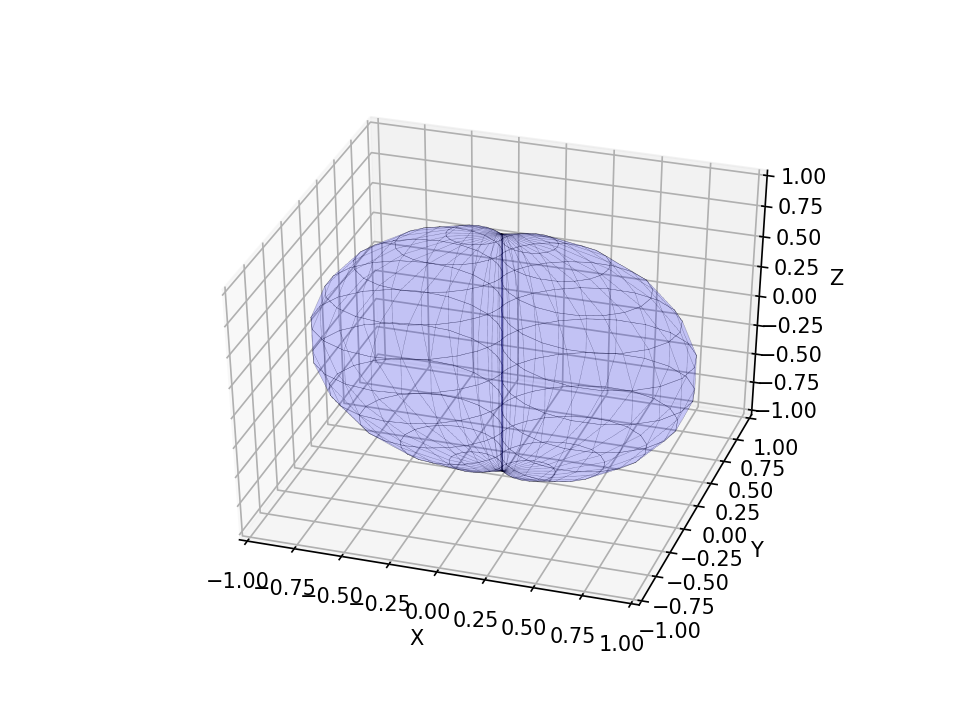

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np
from __future__ import division

fig = plt.figure()

ax = fig.gca(projection='3d')
nphi,nth=48,12

phi = np.linspace(0,360, nphi)/180.0*np.pi
th = np.linspace(-90,90, nth)/180.0*np.pi



verts2 = []
for i  in range(len(phi)-1):
    for j in range(len(th)-1):
        r= np.cos(phi[i])**2     #  <----- your function is here
        r1= np.cos(phi[i+1])**2
        cp0= r*np.cos(phi[i])
        cp1= r1*np.cos(phi[i+1])
        sp0= r*np.sin(phi[i])
        sp1= r1*np.sin(phi[i+1])

        ct0= np.cos(th[j])
        ct1= np.cos(th[j+1])

        st0=  np.sin(th[j])
        st1=  np.sin(th[j+1])

        verts=[]
        verts.append((cp0*ct0, sp0*ct0, st0))
        verts.append((cp1*ct0, sp1*ct0, st0))
        verts.append((cp1*ct1, sp1*ct1, st1))
        verts.append((cp0*ct1, sp0*ct1, st1))
        verts2.append(verts   )

poly3= Poly3DCollection(verts2, linewidth=5,   facecolor=(0, 0, 1, 0.1))  

poly3.set_alpha(0.2)
ax.add_collection3d(Line3DCollection(verts2, colors='k', linewidths=0.2, linestyles=':'))

ax.add_collection3d(poly3)
ax.set_xlabel('X')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 1)
ax.set_zlabel('Z')
ax.set_zlim3d(-1, 1)


plt.show()

<IPython.core.display.Javascript object>


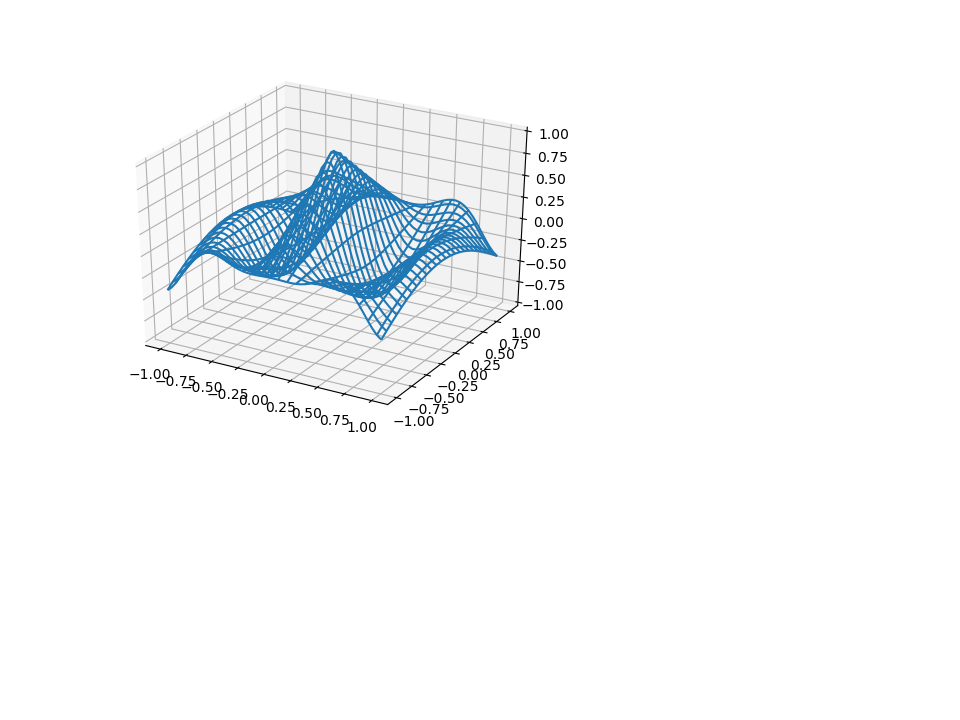

C:\Users\jtf\Miniconda2\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [4]:
#

from __future__ import print_function

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import time


def generate(X, Y, phi):
    '''
    Generates Z data for the points in the X, Y meshgrid and parameter phi.
    '''
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R


def animate(i):

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
tstart = time.time()

for phi in np.linspace(0, 180. / np.pi, 100):
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)

    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)
    plt.pause(.001)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())




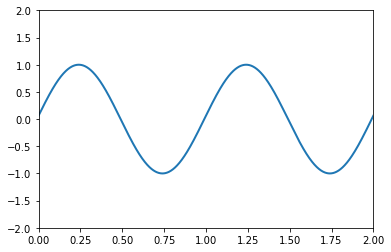

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')




# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())

